# Projeto Final - Tera - Data Science
Notebooks destinados ao desenvolvimento do projeto final do treinamento Tera - Data Science
## Clusterização
1. Objetivo:
    1. Clusterizar as lojas por similaridade 
    2. Identificar os benchmarks de cada cluster
    3. Calcular as lacunas de acordo com os benchmarks
2. Output:
    1. DataSet com as lojas clusterizadas
    2. Lacunas calculadas

In [5]:
# Bibliotecas Padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster as sk_cluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial import distance as sci_distance
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [39]:
df_cluster = pd.read_csv(
    '../data/df_predicted.csv',
    sep=';', 
    usecols=['Store', 'Size', 'Weekly_Sales', 'Weekly_Sales_pred'])

df_cluster = df_cluster.groupby(['Store']).agg({
    'Weekly_Sales':'mean',
    'Weekly_Sales_pred':'mean',
    'Size':'mean'
}).reset_index()

In [40]:
df_cluster

,Store,Weekly_Sales,Weekly_Sales_pred,Size
0,1,21710.543621,18998.179243,151315.0
1,2,26898.070031,23406.521737,202307.0
2,3,6373.033983,8450.385636,37392.0
3,4,29161.210415,23561.105874,205863.0
4,5,5053.415813,8094.267936,34875.0
5,6,21913.243624,23094.664025,202505.0
6,7,8358.766148,11422.236620,70713.0
7,8,13133.014768,18680.634899,155078.0
8,9,8772.890379,15627.137151,125833.0
9,10,26332.303819,16046.077883,126512.0


### Identificando o número ideal de clusters

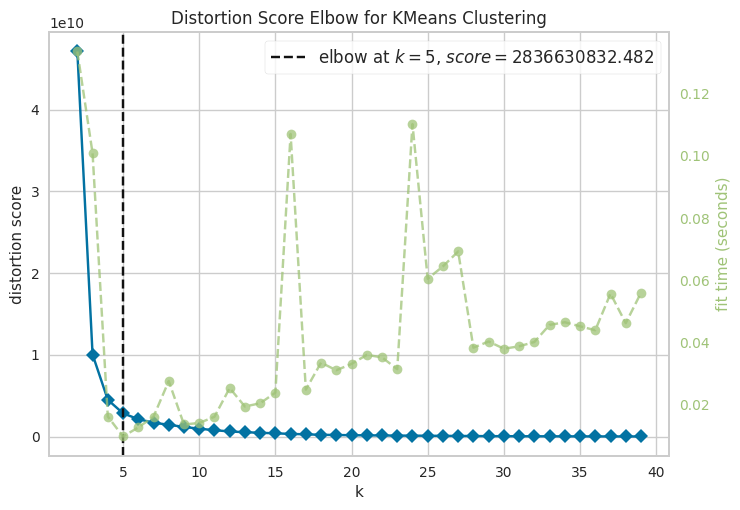


O número ideal de clusters é de 5


In [42]:
# CRIA O VISUALIZADOR DO ELBOW DO KMEANS
visualizer = KElbowVisualizer(KMeans(), k=(2, 40))
# FAZ O FIT DO VISUALIZADOR
visualizer.fit(df_cluster)
# PLOTA O VISUALIZADOR
visualizer.show()
# PRINTA O NUMERO IDEAL DE CLUSTERS
print('\nO número ideal de clusters é de', visualizer.elbow_value_)

### Realizando a clusterização

In [43]:
# CRIA O OBJETO KMEANS
kmeans = KMeans(n_clusters=visualizer.elbow_value_)
# FAZ O FIT DO CLUSTER
kmeans.fit(df_cluster)
# FAZ O TRANSFORM DO CLUSTER
Y = kmeans.transform(df_cluster)

In [44]:
# PEGA O CLUSTER MAIS PROXIMO PARA CADA PONTO
results = np.apply_over_axes(np.argmin,Y,axes=1)
# TRANSFORMA EM UMA SÉRIE
results = pd.Series(results[:,0])
# ADICIONA À TABELA DE CODIGOS
df_cluster['cluster'] = results

In [46]:
df_cluster[['Store','cluster']]

,Store,cluster
0,1,2
1,2,1
2,3,0
3,4,1
4,5,0
5,6,1
6,7,3
7,8,2
8,9,4
9,10,4


In [48]:
df_predicted = pd.read_csv(
    '../data/df_predicted.csv',
    sep=';')

df = df_predicted.merge(
    df_cluster,
    left_on='Store',
    right_on='Store')

df

,Date,IsHoliday,Store,Size_x,Dept,MarkDown5,Weekly_Sales_x,day_of_year,day_circle_x,day_circle_y,Month,Week,Weekly_Sales_pred_x,Weekly_Sales_y,Weekly_Sales_pred_y,Size_y,cluster
0,2010-02-05,0,1,151315,1,0.00,24924.50,36,0.814292,0.580455,2,5,13212.268398,21710.543621,18998.179243,151315.0,2
1,2010-02-05,0,1,151315,2,0.00,50605.27,36,0.814292,0.580455,2,5,13323.840653,21710.543621,18998.179243,151315.0,2
2,2010-02-05,0,1,151315,3,0.00,13740.12,36,0.814292,0.580455,2,5,13435.412909,21710.543621,18998.179243,151315.0,2
3,2010-02-05,0,1,151315,4,0.00,39954.04,36,0.814292,0.580455,2,5,13546.985165,21710.543621,18998.179243,151315.0,2
4,2010-02-05,0,1,151315,5,0.00,32229.38,36,0.814292,0.580455,2,5,13658.557421,21710.543621,18998.179243,151315.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2012-10-26,0,45,118221,93,858.33,2487.80,300,0.433469,-0.901169,10,43,18617.469939,11662.897315,12409.360947,118221.0,4
421566,2012-10-26,0,45,118221,94,858.33,5203.31,300,0.433469,-0.901169,10,43,18729.042195,11662.897315,12409.360947,118221.0,4
421567,2012-10-26,0,45,118221,95,858.33,56017.47,300,0.433469,-0.901169,10,43,18840.614450,11662.897315,12409.360947,118221.0,4
421568,2012-10-26,0,45,118221,97,858.33,6817.48,300,0.433469,-0.901169,10,43,19063.758962,11662.897315,12409.360947,118221.0,4


In [49]:
df.to_csv('../data/df_clusterized.csv', index=False, sep=';')